<a href="https://colab.research.google.com/github/radhakrishnayadav93/Optical_text_recognition_using_PaddleOCR-v3/blob/main/Optical_Character_Recognition_using_PaddleOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optical Character Recognition using PaddleOCR

We will implement PaddleOCR’s PP-OCRv3

In [2]:
!pip install paddlepaddle-gpu
!pip install paddleocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 393.8 MB 22 kB/s 
     |████████████████████████████████| 394 kB 67.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 334 kB 4.9 MB/s 
     |████████████████████████████████| 2.8 MB 54.1 MB/s 
     |████████████████████████████████| 604 kB 64.4 MB/s 
     |████████████████████████████████| 55.7 MB 1.2 MB/s 
     |████████████████████████████████| 50 kB 8.0 MB/s 
     |████████████████████████████████| 399 kB 68.5 MB/s 
     |████████████████████████████████| 204 kB 66.1 MB/s 
     |████████████████████████████████| 2.3 MB 48.6 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149877 sha256=4ea0100c74662a198676328d40be952216b81ee8477921782d6a14eb0b171fc4
  Stored in directory: /root/.cache/pi

We have initialized PP-OCRv3 and the required weights will be downloaded automatically. This package by default provides all of the models of the system which are detection, angle classification and recognition. It provides several arguments to access only the required functionalities.
* lang: The language which we want to recognise is passed here. For example, en for English, ch for Chinese, french for French, etc. The OCR can recognise English and Chinese by default.
* rec_algorithm: Takes the recognition algorithm to be used as arguments. The OCR uses CRNN as its default recognition algorithm.
* det_algorithm: Takes the text detection algorithm to be used as arguments. The OCR uses a DB text detector as its default detector.
* use_angle_cls: Specifies if angle classifier is to be used or not and takes bool as the argument.

In [3]:
from paddleocr import PaddleOCR,draw_ocr
import os
import cv2

import matplotlib.pyplot as plt

%matplotlib inline

ocr = PaddleOCR(use_angle_cls=True)


/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):


download https://paddleocr.bj.bcebos.com/PP-OCRv3/chinese/ch_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/ch/ch_PP-OCRv3_det_infer/ch_PP-OCRv3_det_infer.tar


100%|██████████| 3.83M/3.83M [00:10<00:00, 372kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv3/chinese/ch_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/ch/ch_PP-OCRv3_rec_infer/ch_PP-OCRv3_rec_infer.tar


100%|██████████| 11.9M/11.9M [00:15<00:00, 767kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 1.45M/1.45M [00:07<00:00, 188kiB/s]

[2022/08/06 05:46:58] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/ch/ch_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='f

The OCR is now initialized and can be used in just one line of code.

This function also takes some arguments.


* img: This is the first parameter in the ocr function. In this, the image array or the image path is passed to perform OCR.
* det: Takes bool as an argument and specifies whether to use a detector or not.
* rec: Takes bool as argument and specifies whether to use a recognizer or not.
* cls: Takes bool as argument and specifies whether to use an angle classifier or not.

In [5]:
result = ocr.ocr('./receipt.jpg')

[2022/08/06 05:47:24] ppocr DEBUG: dt_boxes num : 26, elapse : 3.347461223602295
[2022/08/06 05:47:26] ppocr DEBUG: cls num  : 26, elapse : 2.00207257270813
[2022/08/06 05:47:26] ppocr DEBUG: rec_res num  : 26, elapse : 0.12541413307189941


Before moving further, we will create a function to extract the predictions, plot and save them. Let’s call the function save_ocr.

In [6]:
def save_ocr(img_path, out_path, result, font):

  save_path = os.path.join(out_path, img_path.split('/')[-1] + 'output')
  image = cv2.imread(img_path)
  boxes = [line[0] for line in result]
  txts = [line[1][0] for line in result]
  scores = [line[1][1] for line in result]
  im_show = draw_ocr(image, boxes, txts, scores, font_path=font)
  cv2.imwrite('save_path.jpg', im_show)
  img = cv2.cvtColor(im_show, cv2.COLOR_BGR2RGB)
  plt.imshow(img)


In [7]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# Specifying output path and font path.
out_path = './output_images'
font = './simfang.ttf'

# Receipts

In [53]:
img_path = './receipt1.jpg'
result = ocr.ocr(img_path)


[2022/08/06 06:45:55] ppocr DEBUG: dt_boxes num : 20, elapse : 0.05149555206298828
[2022/08/06 06:45:55] ppocr DEBUG: cls num  : 20, elapse : 0.01630878448486328
[2022/08/06 06:45:55] ppocr DEBUG: rec_res num  : 20, elapse : 0.07944154739379883


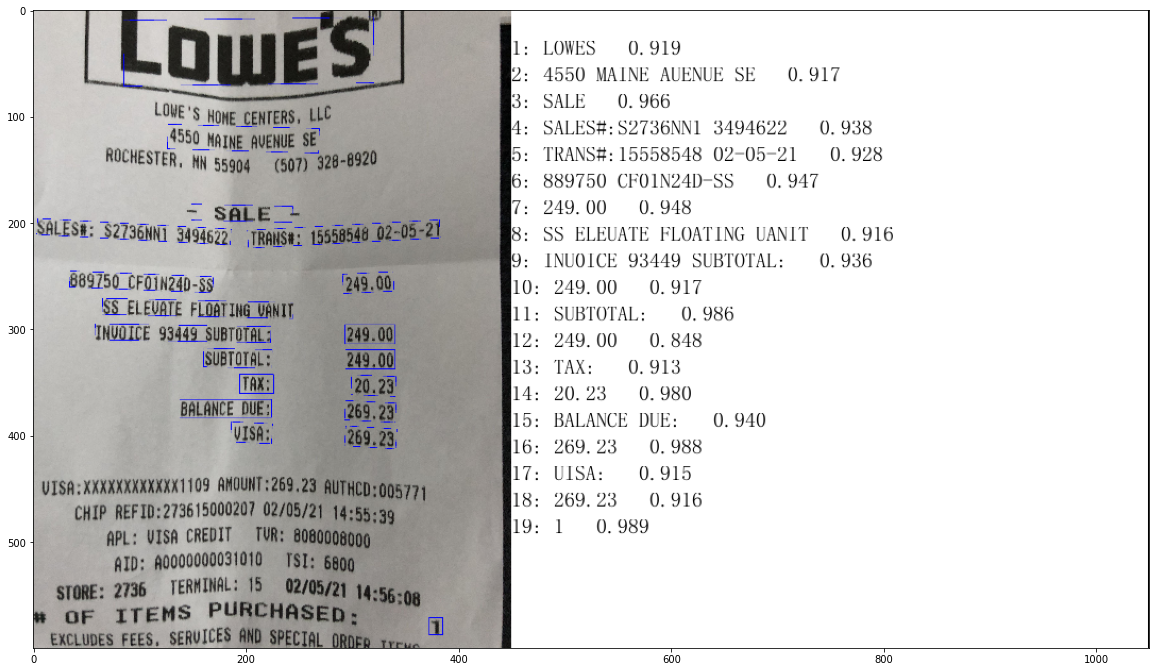

In [54]:
plt.figure(figsize=(20,20))
save_ocr(img_path, out_path, result, font)


On the above image in which seems photo is being taken and the paper shape is uneven and so the text is a little in a curved format, on the more than half top text it is able to detect and recognize text in a good manner but with some text line missing.
On the bottom half it is not able to detect the text. 

In [12]:
img_path = './07-receipt2.png'
result = ocr.ocr(img_path)


[2022/08/06 05:49:26] ppocr DEBUG: dt_boxes num : 34, elapse : 0.03280305862426758
[2022/08/06 05:49:26] ppocr DEBUG: cls num  : 34, elapse : 0.023787260055541992
[2022/08/06 05:49:26] ppocr DEBUG: rec_res num  : 34, elapse : 0.11210370063781738


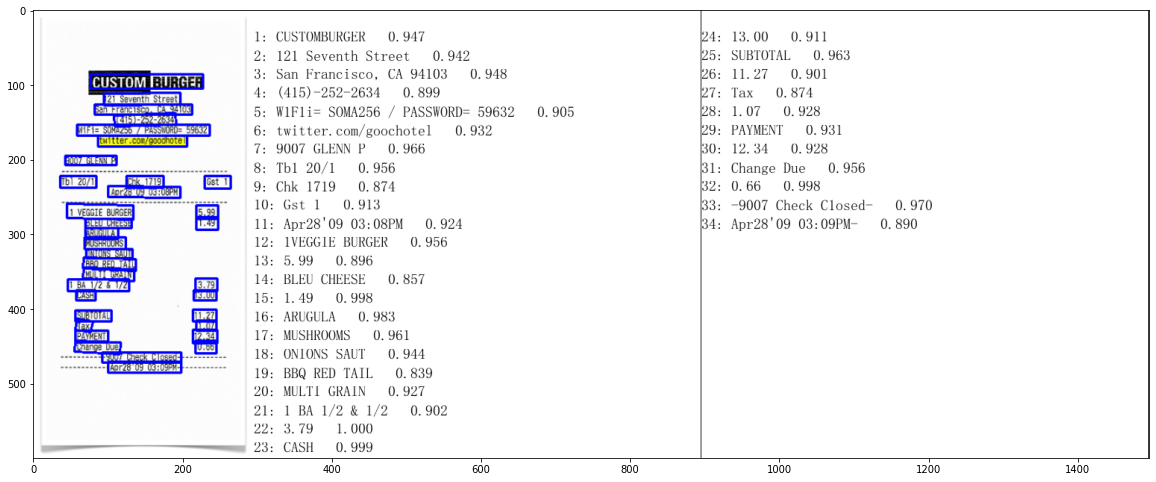

In [13]:
plt.figure(figsize=(20,20))
save_ocr(img_path, out_path, result, font)

On the above image model is performing well.

# ID-cards

In [25]:
img_path = './id_card.jfif'
result = ocr.ocr(img_path)


[2022/08/06 05:58:12] ppocr DEBUG: dt_boxes num : 18, elapse : 0.025975465774536133
[2022/08/06 05:58:12] ppocr DEBUG: cls num  : 18, elapse : 0.013965129852294922
[2022/08/06 05:58:12] ppocr DEBUG: rec_res num  : 18, elapse : 0.07583832740783691


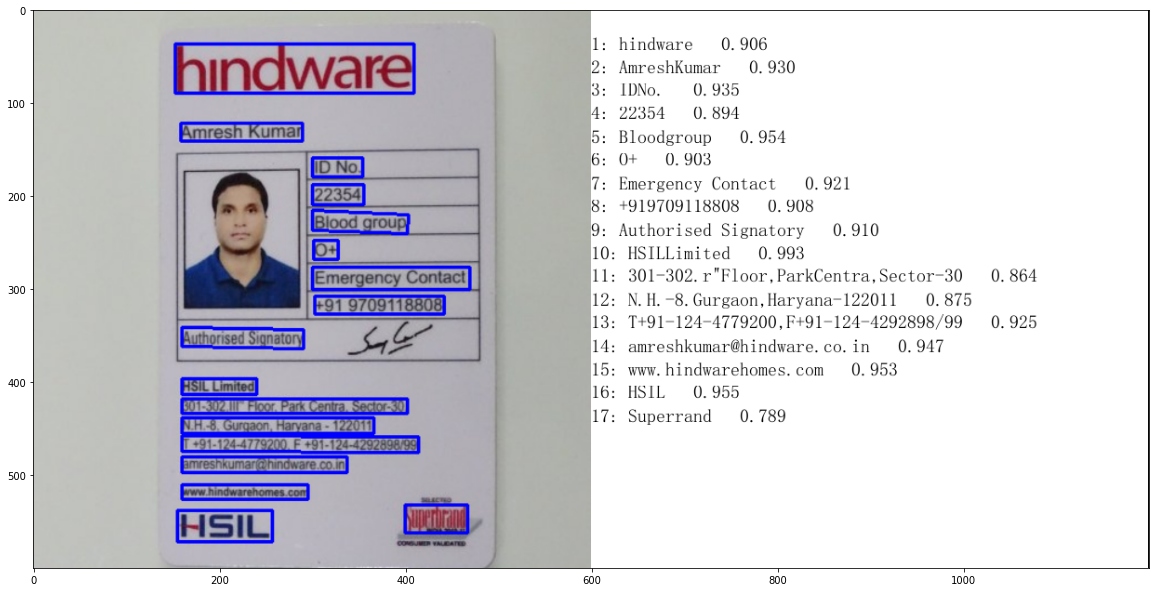

In [26]:
plt.figure(figsize=(20,20))
save_ocr(img_path, out_path, result, font)

# Documents

In [31]:
img_path = './11-document-1.jpg'
result = ocr.ocr(img_path)


[2022/08/05 18:24:29] ppocr DEBUG: dt_boxes num : 35, elapse : 0.05528736114501953
[2022/08/05 18:24:29] ppocr DEBUG: cls num  : 35, elapse : 0.02937602996826172
[2022/08/05 18:24:30] ppocr DEBUG: rec_res num  : 35, elapse : 0.22655940055847168


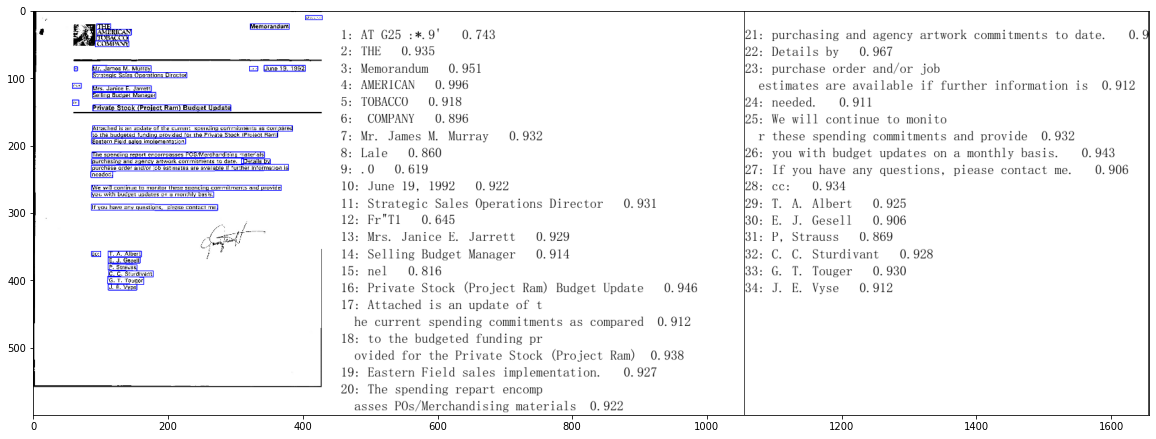

In [32]:
plt.figure(figsize=(20,20))
save_ocr(img_path, out_path, result, font)

On the above scanned document model is predicting well.

In [33]:
img_path = './13-document-2.png'
result = ocr.ocr(img_path)


[2022/08/05 18:26:11] ppocr DEBUG: dt_boxes num : 51, elapse : 0.08710670471191406
[2022/08/05 18:26:12] ppocr DEBUG: cls num  : 51, elapse : 0.04065251350402832
[2022/08/05 18:26:12] ppocr DEBUG: rec_res num  : 51, elapse : 0.2540602684020996


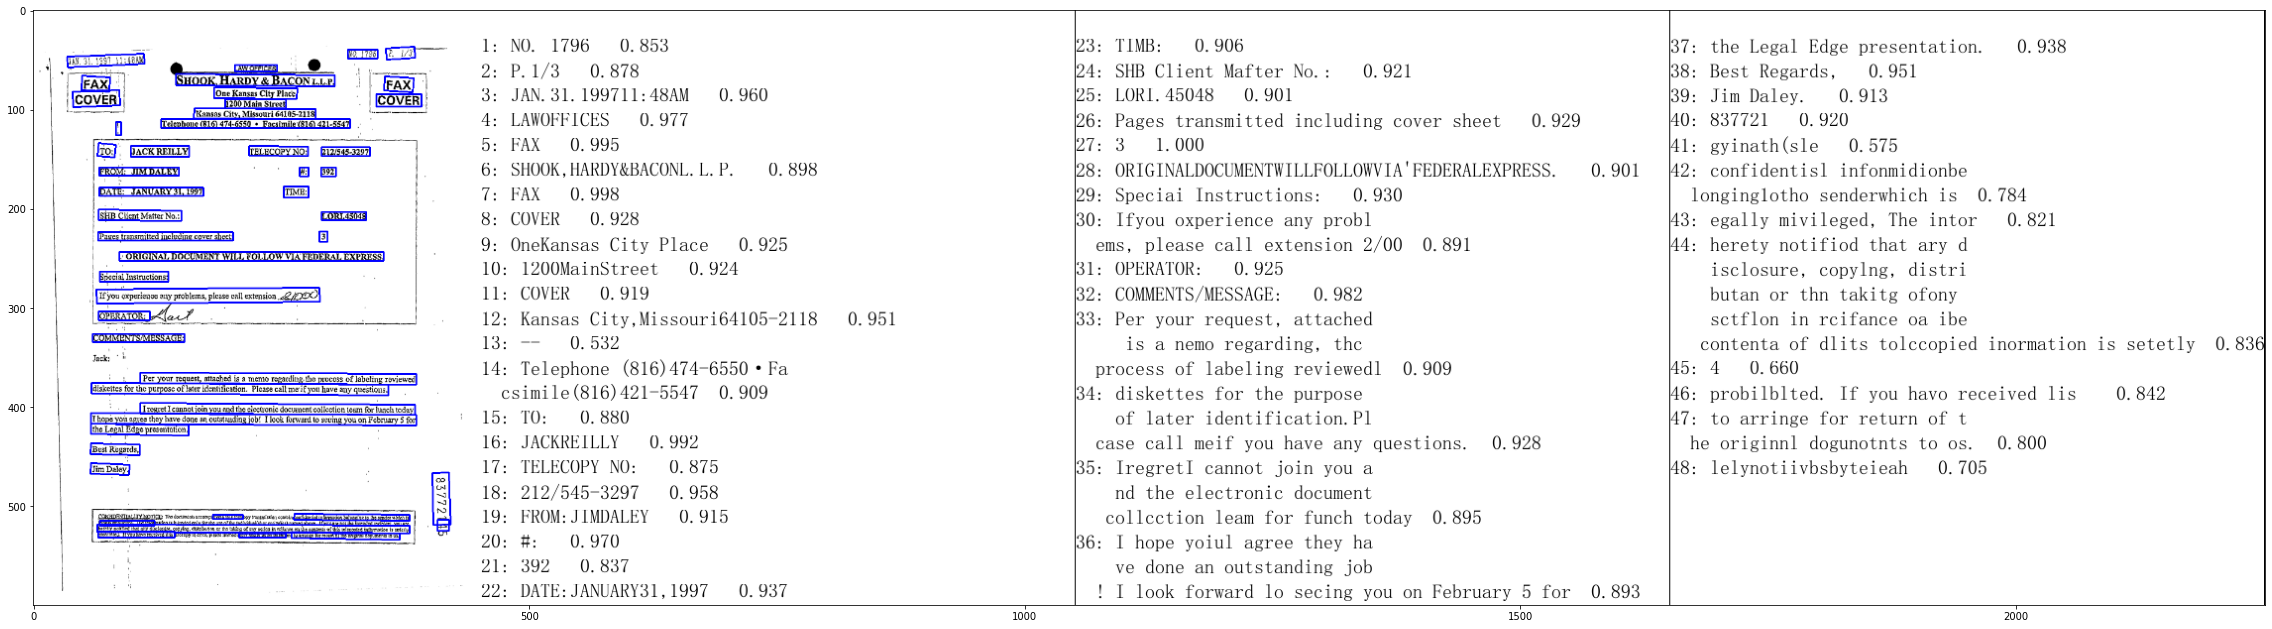

In [35]:
plt.figure(figsize=(20,20))
save_ocr(img_path, out_path, result, font)

The detector in this image has missed some of the texts in this document image. But, whatever text is detected by the detector is correctly predicted by the OCR Looking at the document images we can say that the detector and recognizer are not good at handling small texts. When small text is encountered it misses or incorrectly predicts the output.

# License Plate

In [36]:
img_path = './license_plate.jpg'
result = ocr.ocr(img_path)

[2022/08/06 06:14:02] ppocr DEBUG: dt_boxes num : 8, elapse : 0.0578005313873291
[2022/08/06 06:14:03] ppocr DEBUG: cls num  : 8, elapse : 0.02799701690673828
[2022/08/06 06:14:03] ppocr DEBUG: rec_res num  : 8, elapse : 0.032570600509643555


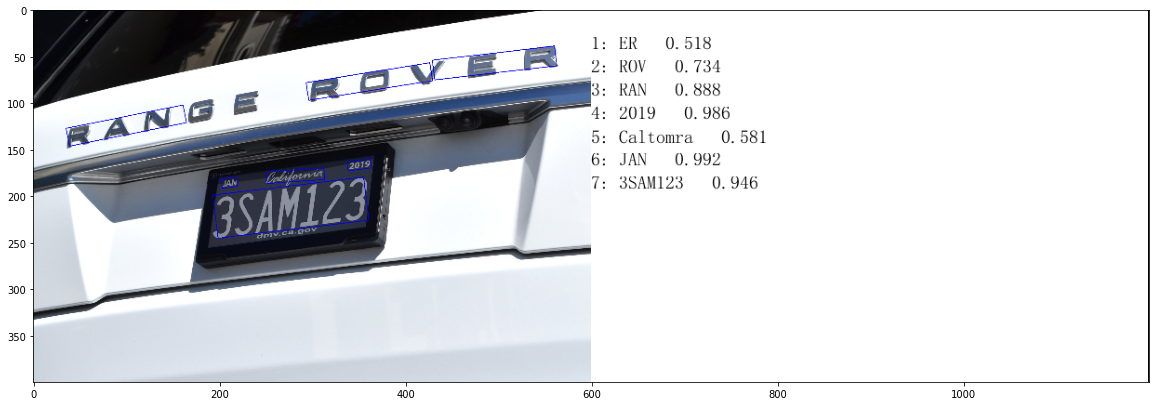

In [37]:
plt.figure(figsize=(20,20))
save_ocr(img_path, out_path, result, font)

On the above license plate, the  model is not performing well as the text format is tilted and not in a straight line.Example, California is in italic format and small also. The license number is predicted well.

# Road Signs

In [33]:
img_path = './road_board_distance_indicator.jpg'
result = ocr.ocr(img_path)


[2022/08/06 06:12:26] ppocr DEBUG: dt_boxes num : 18, elapse : 0.04170536994934082
[2022/08/06 06:12:26] ppocr DEBUG: cls num  : 18, elapse : 0.013849973678588867
[2022/08/06 06:12:27] ppocr DEBUG: rec_res num  : 18, elapse : 0.05919218063354492


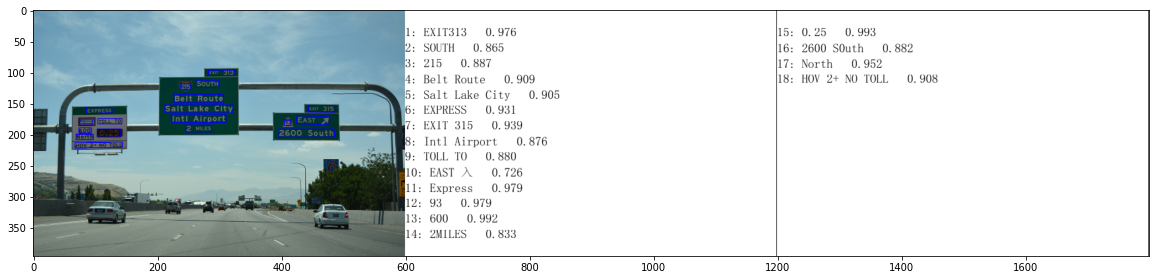

In [34]:
plt.figure(figsize=(20,20))
save_ocr(img_path, out_path, result, font)

# Handwritten Text

In [29]:
img_path = './handwritten_text.jfif'
result = ocr.ocr(img_path)

[2022/08/06 06:01:27] ppocr DEBUG: dt_boxes num : 3, elapse : 0.00988006591796875
[2022/08/06 06:01:27] ppocr DEBUG: cls num  : 3, elapse : 0.005354642868041992
[2022/08/06 06:01:27] ppocr DEBUG: rec_res num  : 3, elapse : 0.015944480895996094


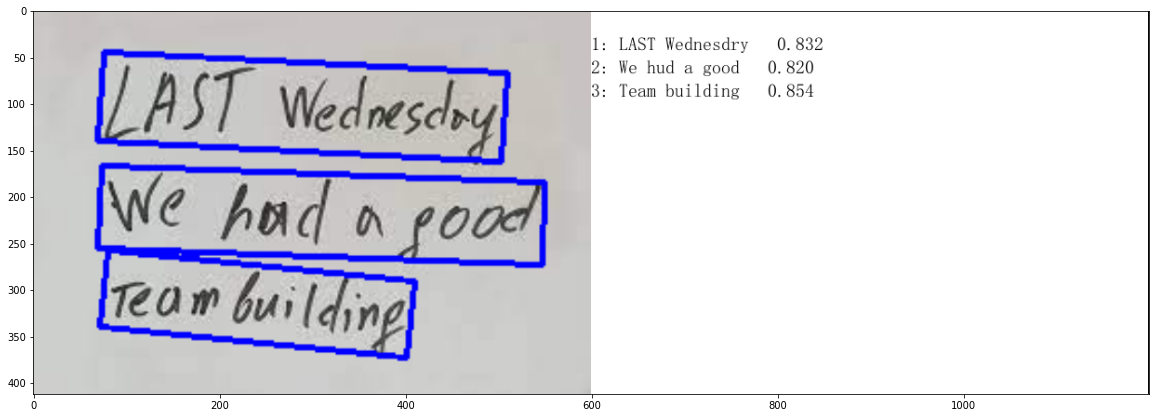

In [30]:
plt.figure(figsize=(20,20))
save_ocr(img_path, out_path, result, font)

As you can see the OCR is not at all accurate. Although the detector was pretty good but the recognizer wasn’t at all. The main reason behind it could be the data the OCR was trained on. PP-OCR is trained on MJSynth and SynthText dataset, which is a synthetic text dataset. These datasets are not real-life text images but rather computer-generated text images. So, Due to lack of handwritten text in the training dataset could be a big factor in the poor performance of OCR on these types of images.

In [38]:
img_path = './trading_card.jpg'
result = ocr.ocr(img_path)

[2022/08/06 06:17:01] ppocr DEBUG: dt_boxes num : 34, elapse : 0.0794222354888916
[2022/08/06 06:17:01] ppocr DEBUG: cls num  : 34, elapse : 0.06279373168945312
[2022/08/06 06:17:01] ppocr DEBUG: rec_res num  : 34, elapse : 0.1991710662841797


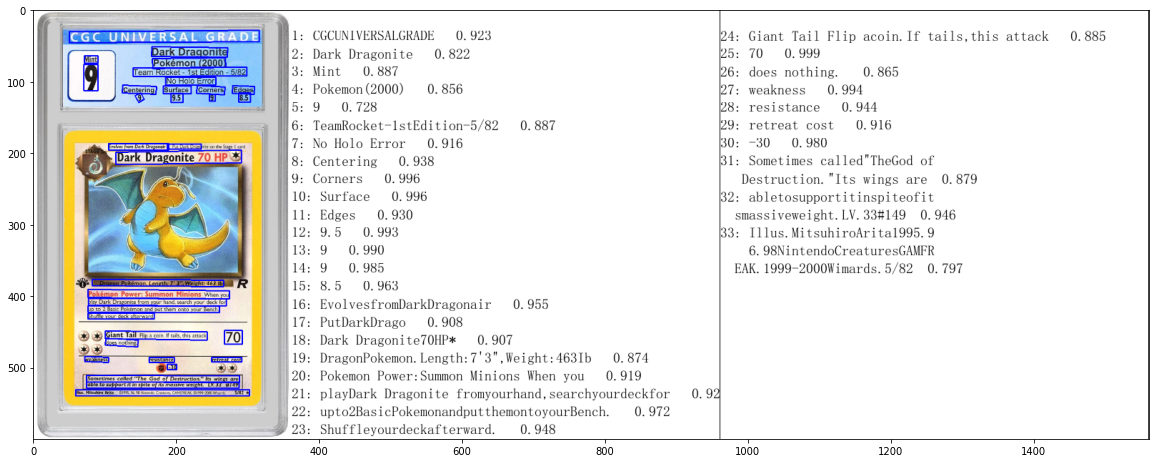

In [39]:
plt.figure(figsize=(20,20))
save_ocr(img_path, out_path, result, font)

The OCR has performed alright on this, not too good and not too bad. There are a few things to notice here, The OCR was predicting some text without spaces where the text is a bit small in size similar to a case in the document section. Also, the detector has not detected some text fields which are also very small in size.

# Curved text

In [48]:
img_path = './curved_text_1.jpg'
result = ocr.ocr(img_path)

[2022/08/06 06:24:28] ppocr DEBUG: dt_boxes num : 1, elapse : 0.034102439880371094
[2022/08/06 06:24:28] ppocr DEBUG: cls num  : 1, elapse : 0.005565643310546875
[2022/08/06 06:24:28] ppocr DEBUG: rec_res num  : 1, elapse : 0.007861852645874023


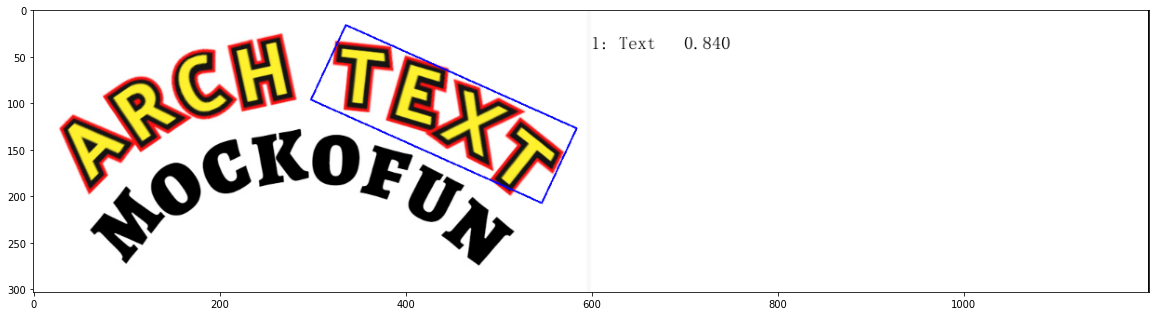

In [49]:
plt.figure(figsize=(20,20))
save_ocr(img_path, out_path, result, font)

In [51]:
img_path = './curved_text.jpg'
result = ocr.ocr(img_path)

[2022/08/06 06:25:39] ppocr DEBUG: dt_boxes num : 2, elapse : 0.008704185485839844
[2022/08/06 06:25:39] ppocr DEBUG: cls num  : 2, elapse : 0.003996133804321289
[2022/08/06 06:25:39] ppocr DEBUG: rec_res num  : 2, elapse : 0.010673999786376953


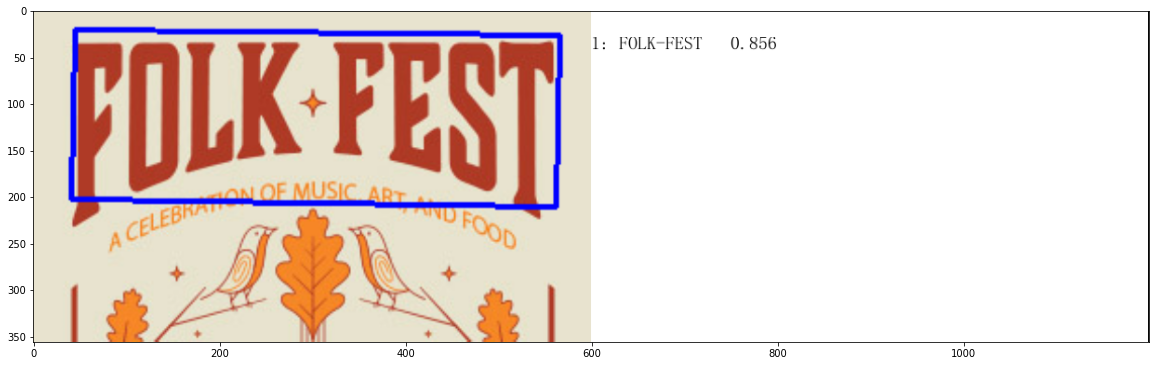

In [52]:
plt.figure(figsize=(20,20))
save_ocr(img_path, out_path, result, font)

As you can see the results are very poor. The detector wasn’t able to detect the text fields. The reason is because of training data. The data on which the default detector is trained on, contains all straight-line text. Even the neural network should predict curved bounding boxes which are not possible by using the same network as used now. Because of this when a curved text is seen, the detector cannot detect it.

# Conclusion

From the above experiments, we can conclude that PP-OCR is a very fast and highly accurate OCR along with a text detector. But it fails in some cases such as handwritten texts, curved texts and small texts which leave the text partly detected or recognized inaccurately. To solve these problems the OCR and detector can be finetuned on more datasets which can help in increasing accuracy and getting better performance in various different scenarios.